In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
import time
from datetime import datetime
import requests
from config import weather_api_key

In [2]:
lats = np.random.uniform(low=-90.000,high=90.000,size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
coordinates = list(zip(lats,lngs))

In [4]:
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
len(cities)

582

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
city_data = []

print('Beginning Data Retrieval')
print('------------------------')

record_count = 1
set_count = 1

Beginning Data Retrieval
------------------------


In [7]:
for i,city in enumerate(cities):
    
    if (i % 50 ==0 and i >=50):
        set_count +=1
        record_count =1
        time.sleep(60)
    
    city_url = url +'&q=' + city.replace(" ","+")
    
    #print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count +=1
    
    try:
        city_weather = requests.get(city_url).json()
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        
        city_data.append({'City': city.title(),
                         'Lat': city_lat,
                          'Lng': city_lng,
                          'Max Temp': city_max_temp,
                          'Humidity': city_humidity,
                          'Cloudiness': city_clouds,
                          'Wind Speed': city_wind,
                          'Country': city_country,
                          'Date': city_date
                          })
        
    except:
        #print('City not found. Skipping...')
        pass
        
print('------------------------')
print('Data Retrieval Complete ')
print('------------------------')

------------------------
Data Retrieval Complete 
------------------------


In [8]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ponta Do Sol,32.6667,-17.1000,65.71,78,99,5.73,PT,2022-01-23 22:57:55
1,Hobart,-42.8794,147.3294,75.02,70,100,1.01,AU,2022-01-23 22:55:26
2,Butaritari,3.0707,172.7902,82.24,78,99,17.92,KI,2022-01-23 22:57:56
3,Hermanus,-34.4187,19.2345,68.81,94,52,6.49,ZA,2022-01-23 22:54:12
4,Assiniboia,49.6334,-105.9845,37.31,86,100,19.57,CA,2022-01-23 22:57:56
5,Kiruna,67.8557,20.2251,40.12,70,100,2.30,SE,2022-01-23 22:57:56
6,Salalah,17.0151,54.0924,62.96,30,1,12.59,OM,2022-01-23 22:57:56
7,Matara,5.9485,80.5353,71.94,91,100,4.18,LK,2022-01-23 22:57:57
8,Albany,42.6001,-73.9662,27.81,83,100,2.13,US,2022-01-23 22:57:57
9,Barrow,71.2906,-156.7887,1.35,96,100,2.77,US,2022-01-23 22:57:57


In [9]:
column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ponta Do Sol,PT,2022-01-23 22:57:55,32.6667,-17.1000,65.71,78,99,5.73
1,Hobart,AU,2022-01-23 22:55:26,-42.8794,147.3294,75.02,70,100,1.01
2,Butaritari,KI,2022-01-23 22:57:56,3.0707,172.7902,82.24,78,99,17.92
3,Hermanus,ZA,2022-01-23 22:54:12,-34.4187,19.2345,68.81,94,52,6.49
4,Assiniboia,CA,2022-01-23 22:57:56,49.6334,-105.9845,37.31,86,100,19.57
5,Kiruna,SE,2022-01-23 22:57:56,67.8557,20.2251,40.12,70,100,2.30
6,Salalah,OM,2022-01-23 22:57:56,17.0151,54.0924,62.96,30,1,12.59
7,Matara,LK,2022-01-23 22:57:57,5.9485,80.5353,71.94,91,100,4.18
8,Albany,US,2022-01-23 22:57:57,42.6001,-73.9662,27.81,83,100,2.13
9,Barrow,US,2022-01-23 22:57:57,71.2906,-156.7887,1.35,96,100,2.77


In [10]:
#create the output file (CSV)
output_data_file = 'weather_data_cities.csv'
#export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [11]:
#Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

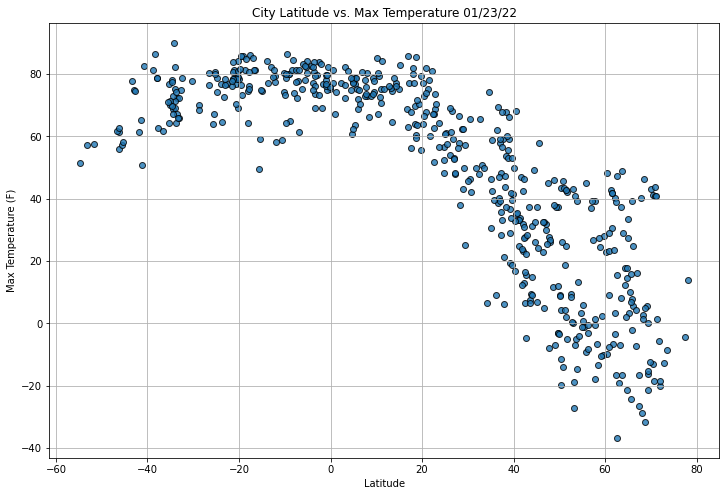

In [12]:
# BUild the scatter plot for latitude vs max temperature
plt.figure(figsize=(12,8))
plt.scatter(lats,
           max_temps,
           edgecolor='k',linewidth=1,marker='o',
           alpha=0.8, label='Cities')


plt.title(f"City Latitude vs. Max Temperature "+time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data_Fig1.png')

plt.show()

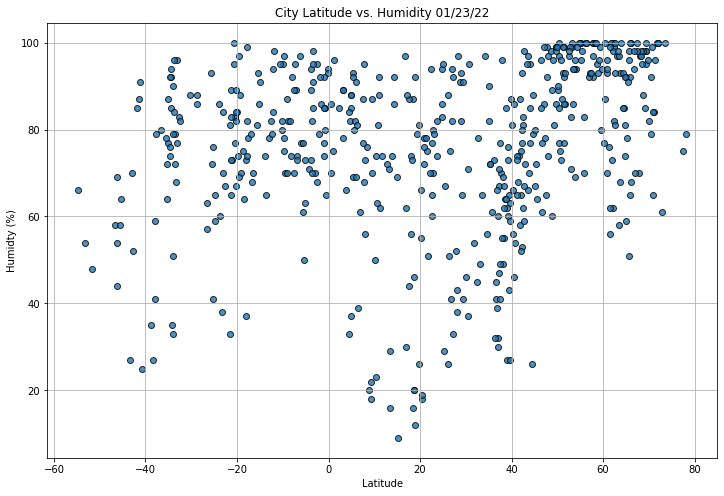

In [13]:
plt.figure(figsize=(12,8))
plt.scatter(lats,
           humidity,
           edgecolor='k',linewidth=1,marker='o',
           alpha=0.8,label='Cities')

plt.title(f"City Latitude vs. Humidity "+time.strftime('%x'))
plt.ylabel('Humidty (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data_Fig2.png')

plt.show()

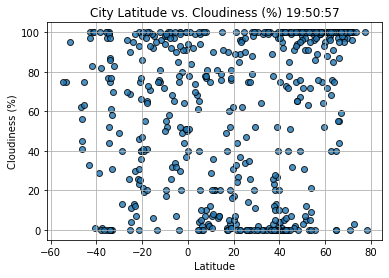

In [15]:
plt.scatter(lats,
           cloudiness,
           edgecolor='k',linewidth=1,marker='o',
           alpha=0.8,label='Cities')

plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime('%X'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data_Fig3.png')

plt.show()

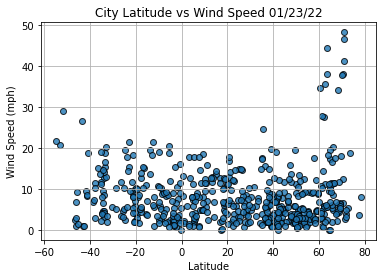

In [17]:
plt.scatter(lats,
           wind_speed,
           edgecolor='k',linewidth=1,marker='o',
           alpha=0.8,label='Cities')

plt.title(f"City Latitude vs Wind Speed " +time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data_Fig4.png')

plt.show()